**CONASS 4**

---

**Question 1**
- This dataset contains records of 553 patients, encompassing a mixture of individuals diagnosed with and without liver disease. The prediction task is to determine whether a patient suffers from liver disease based on information about several biochemical markers, as well as clinical and sociodemographic profiles. The dataset comprises 12 features and 1 target variable. The details of the dataset (assignment.csv) are as follows:

| Variable Name | Description |
|---------------|-------------|
| Age           | Age |
| gender        | Gender |
| ethnic        | Patient’s ethnicity: 1-Malay, 2-Chinese, 3-Indian |
| TB            | Total Bilirubin |
| DB            | Direct Bilirubin |
| TP            | Total Proteins |
| ALB           | Albumin |
| SGPT          | Alanine Aminotransferase |
| SGOT          | Aspartate Aminotransferase |
| Alkphos       | Alkaline Phosphatase |
| AGR           | Albumin and Globulin Ratio |
| BMI           | Body mass index: 1- Normal, 2- Overweight |
| Disease       | Liver disease: 1 – No disease, 2 - Disease |

----

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('assignment4.csv')

# Display the first few rows of the dataset
data.head()


,Patient_ID,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Disease,Ethnic,Gender,bmi
0,1,58,1.0,0.4,182,20,14,6.8,3.4,1,1,1,Male,2
1,2,46,1.8,0.7,208,14,19,7.6,4.4,1.3,1,1,Male,1
2,3,26,0.9,0.2,154,12,16,7.0,3.5,1,1,1,Female,1
3,4,29,0.9,0.3,202,11,14,6.7,3.6,1.1,1,1,Female,1
4,5,65,0.7,0.1,187,18,16,6.8,3.3,0.9,1,1,Female,1


In [2]:
# Remove the Patient_ID column
data = data.drop('Patient_ID', axis=1)

# Display the first few rows of the dataset
data.head()

,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Disease,Ethnic,Gender,bmi
0,58,1.0,0.4,182,20,14,6.8,3.4,1,1,1,Male,2
1,46,1.8,0.7,208,14,19,7.6,4.4,1.3,1,1,Male,1
2,26,0.9,0.2,154,12,16,7.0,3.5,1,1,1,Female,1
3,29,0.9,0.3,202,11,14,6.7,3.6,1.1,1,1,Female,1
4,65,0.7,0.1,187,18,16,6.8,3.3,0.9,1,1,Female,1


In [3]:
# Recode the Gender column
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows to confirm the changes
data.head()

,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Disease,Ethnic,Gender,bmi
0,58,1.0,0.4,182,20,14,6.8,3.4,1,1,1,0,2
1,46,1.8,0.7,208,14,19,7.6,4.4,1.3,1,1,0,1
2,26,0.9,0.2,154,12,16,7.0,3.5,1,1,1,1,1
3,29,0.9,0.3,202,11,14,6.7,3.6,1.1,1,1,1,1
4,65,0.7,0.1,187,18,16,6.8,3.3,0.9,1,1,1,1


In [4]:
# Check the data types of the columns to identify any potential issues
data.dtypes


Age          int64
TB         float64
DB         float64
Alkphos      int64
Sgot         int64
Sgpt         int64
TP         float64
ALB        float64
AGR         object
Disease      int64
Ethnic       int64
Gender       int64
bmi          int64
dtype: object

In [5]:
# Convert AGR column to numeric, coercing errors to NaN
data['AGR'] = pd.to_numeric(data['AGR'], errors='coerce')

# Check the data types again to confirm the change
data.dtypes

Age          int64
TB         float64
DB         float64
Alkphos      int64
Sgot         int64
Sgpt         int64
TP         float64
ALB        float64
AGR        float64
Disease      int64
Ethnic       int64
Gender       int64
bmi          int64
dtype: object

**Missing Data**

In [6]:
# Check for missing data in the dataset
missing_data = data.isnull().sum()
missing_data

Age        0
TB         0
DB         0
Alkphos    0
Sgot       0
Sgpt       0
TP         0
ALB        0
AGR        4
Disease    0
Ethnic     0
Gender     0
bmi        0
dtype: int64

In [7]:
data.AGR.unique()

array([1.  , 1.3 , 1.1 , 0.9 , 0.74, 0.89, 0.8 , 0.6 , 0.87, 0.5 , 1.2 ,
       1.4 , 0.61, 1.34, 0.4 , 0.7 , 1.6 , 1.25, 0.78, 1.55, 0.62, 0.95,
       1.5 , 1.66, 0.96, 1.38, 0.47, 0.93, 0.48, 0.69, 1.27, 1.12, 0.53,
       0.75, 0.68,  nan, 1.8 , 0.3 , 0.97, 1.58, 1.06, 0.35, 0.64, 1.36,
       0.88, 1.09, 1.11, 1.72, 1.16, 2.8 , 0.46, 0.39, 1.02, 2.5 , 0.92,
       1.85, 1.18, 1.39, 0.76, 0.71, 0.67, 0.58, 1.03, 1.9 , 1.7 , 0.45,
       0.52, 0.37])

In [8]:
# Drop rows with missing values
data_cleaned = data.dropna()

# Check the shape of the data to confirm rows are dropped
data_cleaned.shape


(549, 13)

**Outlier**

In [9]:
import numpy as np

# Function to identify outliers based on IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical columns
numerical_columns = ['Age', 'TB', 'DB', 'Alkphos', 'Sgot', 'Sgpt', 'TP', 'ALB', 'AGR']

# Dictionary to store outliers for each column
outliers_dict = {}

# Identify outliers for each numerical column
for column in numerical_columns:
    outliers_dict[column] = identify_outliers(data_cleaned, column)

# Display the number of outliers in each column
outliers_summary = {column: len(outliers) for column, outliers in outliers_dict.items()}
outliers_summary


{'Age': 0,
 'TB': 78,
 'DB': 78,
 'Alkphos': 61,
 'Sgot': 64,
 'Sgpt': 70,
 'TP': 7,
 'ALB': 0,
 'AGR': 10}

In [10]:
import numpy as np

# Function to cap outliers based on IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Explicitly cast to compatible dtype
    lower_bound = lower_bound.astype(df[column].dtype)
    upper_bound = upper_bound.astype(df[column].dtype)
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

# Cap outliers for each numerical column
for column in numerical_columns:
    data_cleaned = cap_outliers(data_cleaned, column)

# Check the dataset to confirm changes
print(data_cleaned.describe())


              Age          TB          DB     Alkphos        Sgot        Sgpt  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean    44.460838    1.906193    0.837158  248.918033   65.160291   47.561020   
std     16.038981    1.645309    0.917751  108.902482   54.069027   32.787616   
min      4.000000    0.400000    0.100000   63.000000   10.000000   10.000000   
25%     33.000000    0.800000    0.200000  175.000000   25.000000   23.000000   
50%     45.000000    1.000000    0.300000  206.000000   42.000000   35.000000   
75%     57.000000    2.600000    1.200000  298.000000   87.000000   60.000000   
max     90.000000    5.300000    2.700000  482.000000  180.000000  115.000000   

               TP         ALB         AGR     Disease      Ethnic      Gender  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     6.483242    3.143716    0.945209    1.306011    1.755920    0.245902   
std      1.064958    0.7875

In [11]:
from tabulate import tabulate
# Define the categorical columns
categorical_columns = ['Gender', 'Ethnic', 'bmi', 'Disease']

# Function to generate descriptive statistics for categorical columns
def descriptive_stats_categorical(df, columns):
    stats = {}
    for column in columns:
        count = df[column].value_counts()
        percentage = (count / len(df[column])) * 100
        stats[column] = pd.concat([count, percentage], axis=1, keys=['Count', 'Percentage'])
    return stats

# Generate and display descriptive statistics for the categorical columns
categorical_stats = descriptive_stats_categorical(data_cleaned, categorical_columns)
for column, stats in categorical_stats.items():
    print(f"Descriptive statistics for {column}:")
    print(tabulate(stats, headers='keys', tablefmt='grid'))
    print()

Descriptive statistics for Gender:
+----------+---------+--------------+
|   Gender |   Count |   Percentage |
+==========+=========+==============+
|        0 |     414 |      75.4098 |
+----------+---------+--------------+
|        1 |     135 |      24.5902 |
+----------+---------+--------------+

Descriptive statistics for Ethnic:
+----------+---------+--------------+
|   Ethnic |   Count |   Percentage |
+==========+=========+==============+
|        1 |     272 |      49.5446 |
+----------+---------+--------------+
|        2 |     139 |      25.3188 |
+----------+---------+--------------+
|        3 |     138 |      25.1366 |
+----------+---------+--------------+

Descriptive statistics for bmi:
+-------+---------+--------------+
|   bmi |   Count |   Percentage |
+=======+=========+==============+
|     1 |     352 |      64.1166 |
+-------+---------+--------------+
|     2 |     197 |      35.8834 |
+-------+---------+--------------+

Descriptive statistics for Disease:
+-----

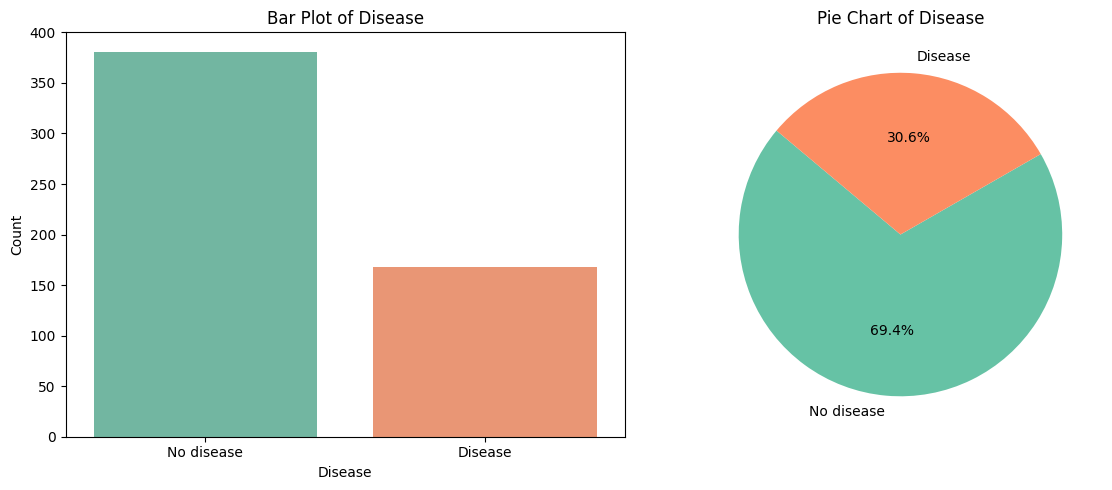

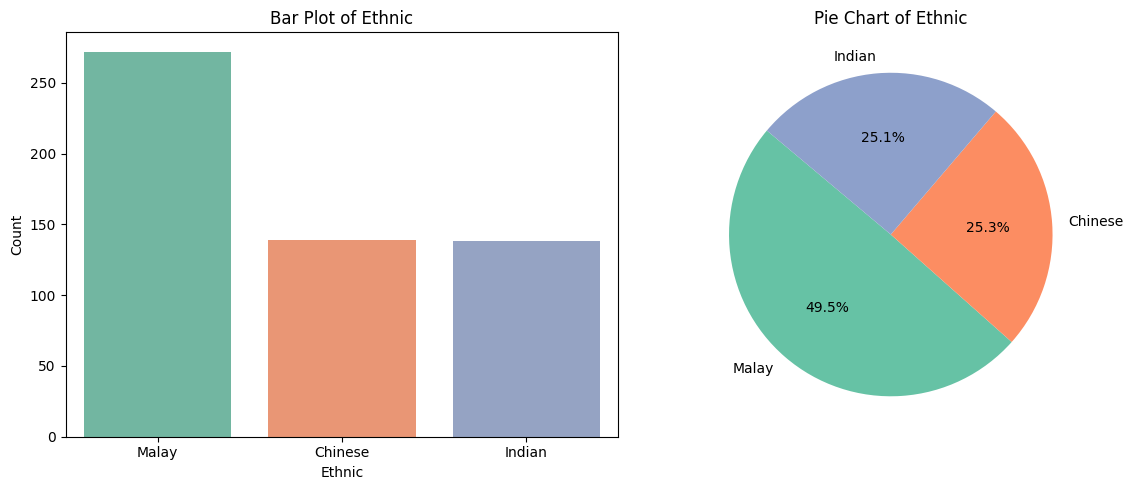

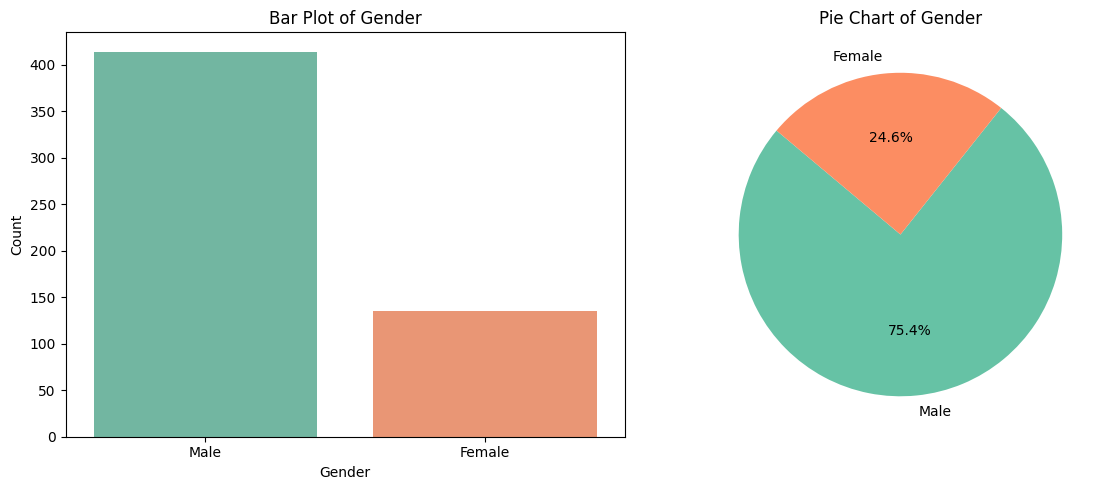

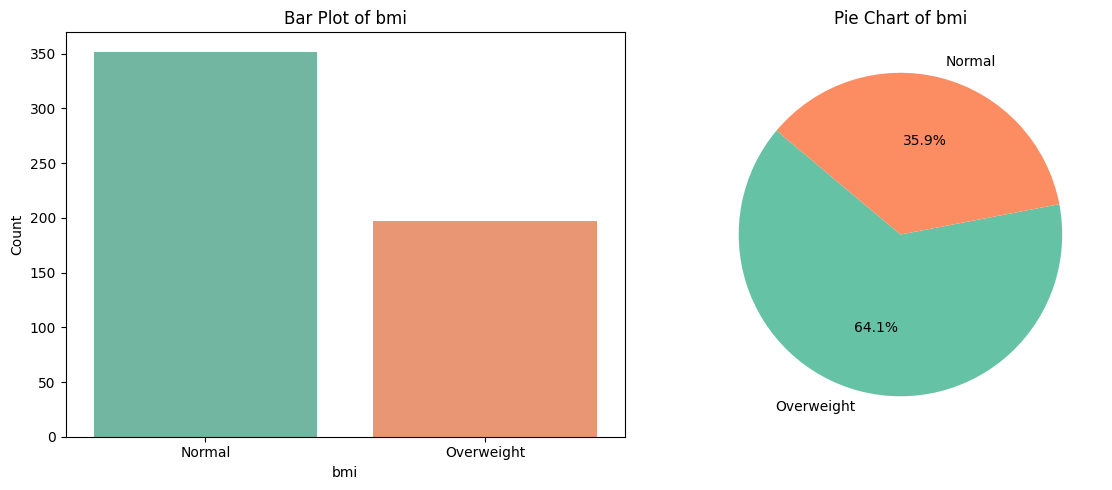

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping for categorical variables
ethnic_mapping = {1: 'Malay', 2: 'Chinese', 3: 'Indian'}
gender_mapping = {0: 'Male', 1: 'Female'}
disease_mapping = {1: 'No disease', 2: 'Disease'}
bmi_mapping = {1: 'Normal', 2: 'Overweight'}

# List of categorical columns
categorical_columns = ['Disease', 'Ethnic', 'Gender', 'bmi']

# Create bar plots and pie charts for categorical data
for column in categorical_columns:
    plt.figure(figsize=(12, 5))
    
    # Bar plot
    plt.subplot(1, 2, 1)
    if column == 'Ethnic':
        sns.countplot(data=data_cleaned, x=column, hue='Ethnic', palette='Set2', legend=False)
        plt.xticks(ticks=[0, 1, 2], labels=[ethnic_mapping[i] for i in sorted(data_cleaned[column].unique())])
    elif column == 'Gender':
        sns.countplot(data=data_cleaned, x=column, hue='Gender', palette='Set2', legend=False)
        plt.xticks(ticks=[0, 1], labels=[gender_mapping[i] for i in sorted(data_cleaned[column].unique())])
    elif column == 'Disease':
        sns.countplot(data=data_cleaned, x=column, hue='Disease', palette='Set2', legend=False)
        plt.xticks(ticks=[0, 1], labels=[disease_mapping[i] for i in sorted(data_cleaned[column].unique())])
    elif column == 'bmi':
        sns.countplot(data=data_cleaned, x=column, hue='bmi', palette='Set2', legend=False)
        plt.xticks(ticks=[0, 1], labels=[bmi_mapping[i] for i in sorted(data_cleaned[column].unique())])
    else:
        sns.countplot(data=data_cleaned, x=column, palette='Set2')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    if column == 'Ethnic':
        labels = [ethnic_mapping[i] for i in data_cleaned[column].unique()]
    elif column == 'Gender':
        labels = [gender_mapping[i] for i in data_cleaned[column].unique()]
    elif column == 'Disease':
        labels = [disease_mapping[i] for i in data_cleaned[column].unique()]
    elif column == 'bmi':
        labels = [bmi_mapping[i] for i in data_cleaned[column].unique()]
    else:
        labels = data_cleaned[column].unique()
    plt.pie(data_cleaned[column].value_counts(), labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'Pie Chart of {column}')
    
    plt.tight_layout()
    plt.show()


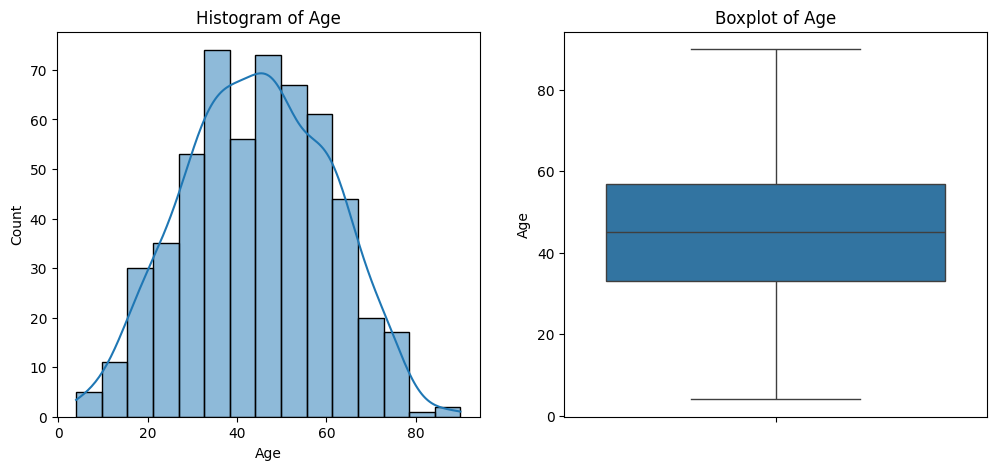

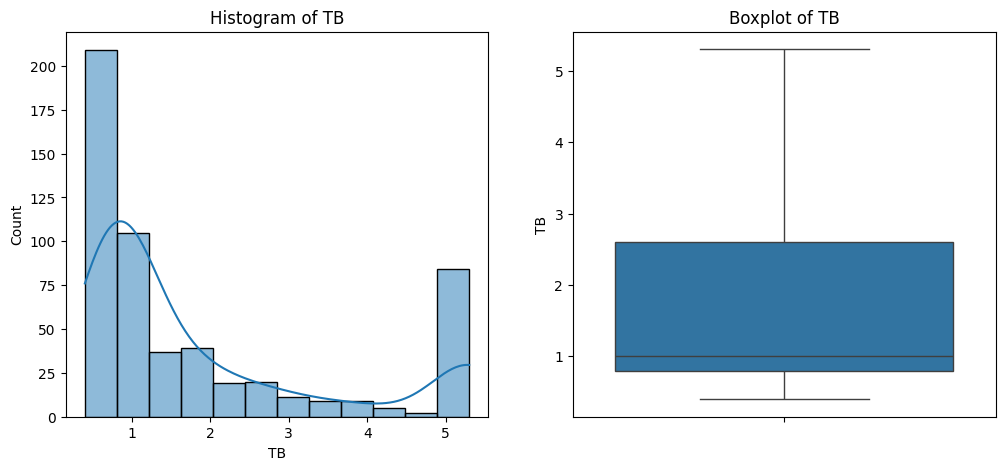

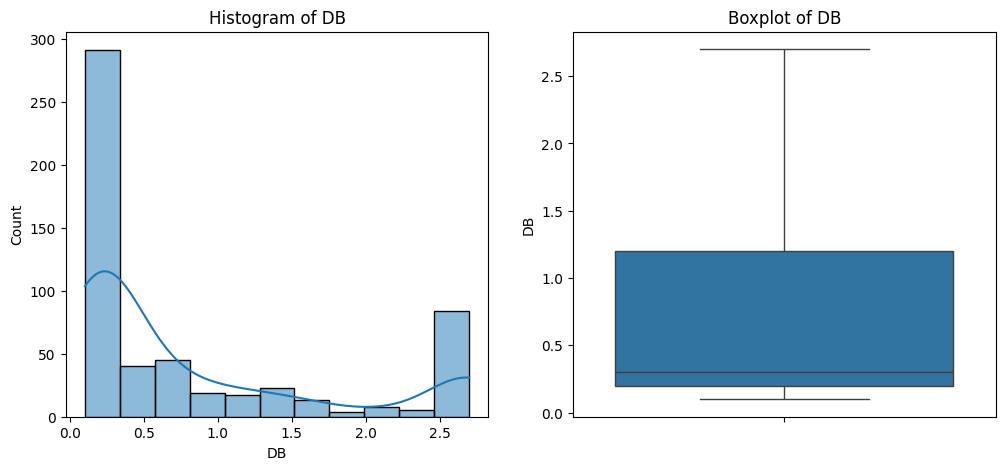

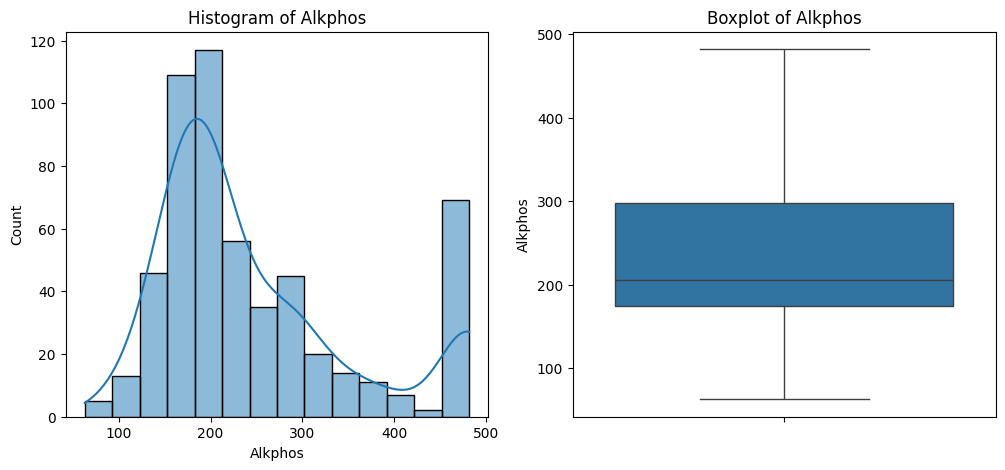

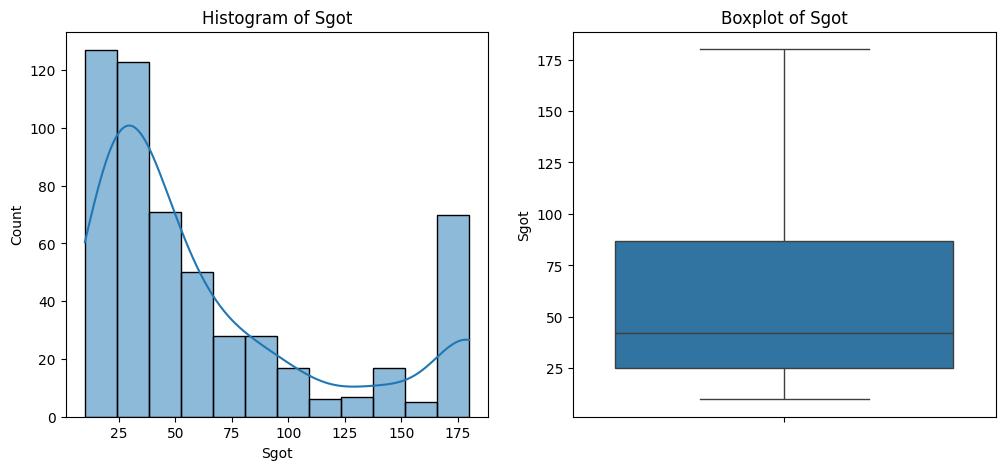

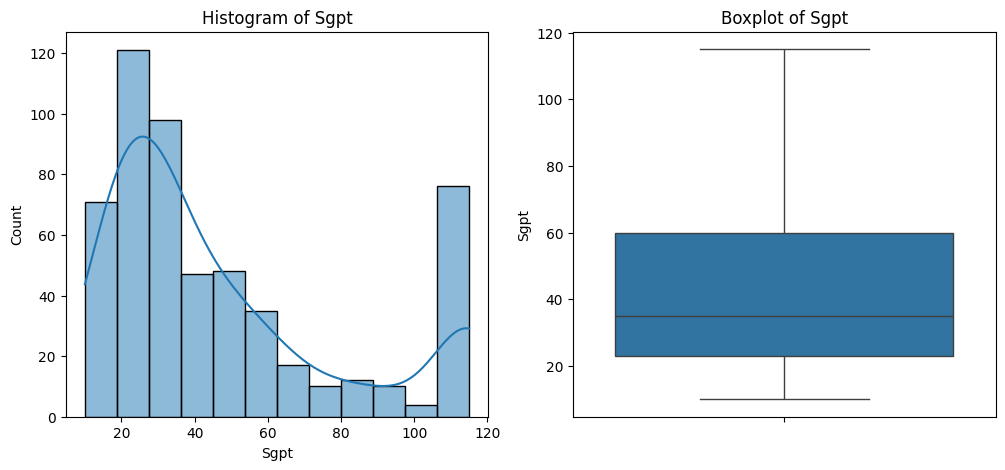

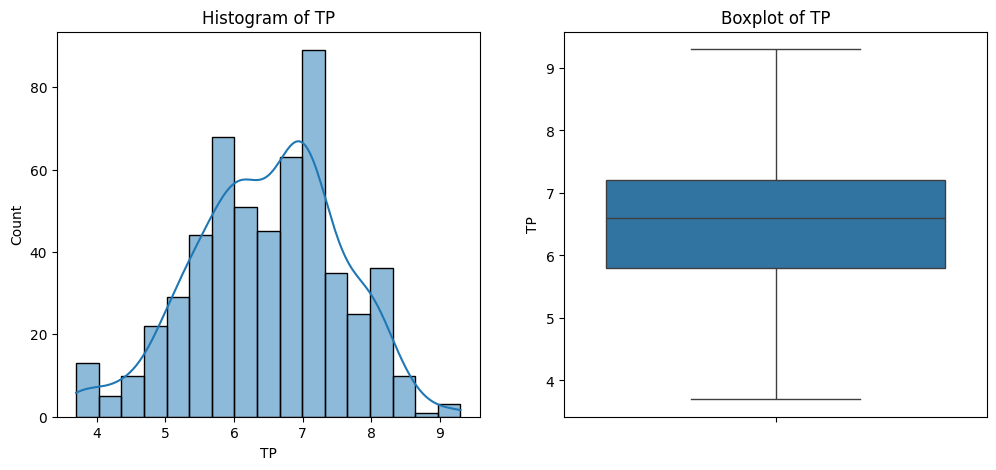

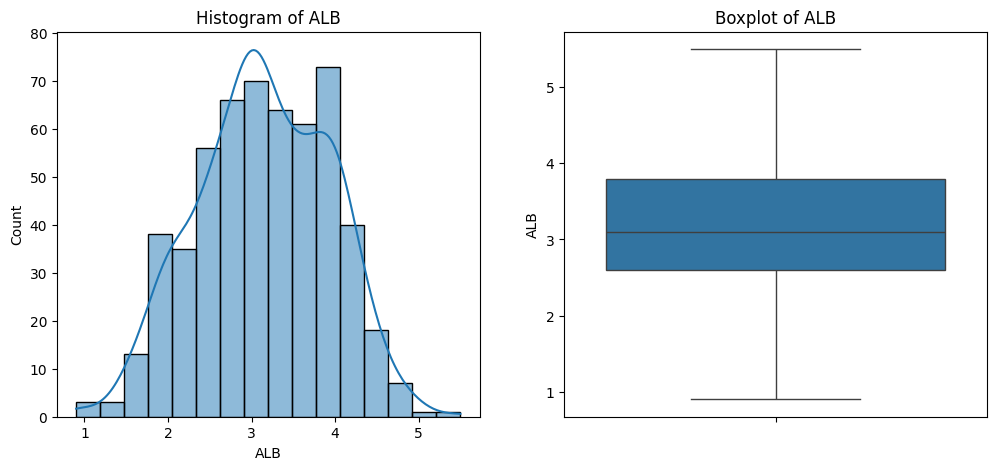

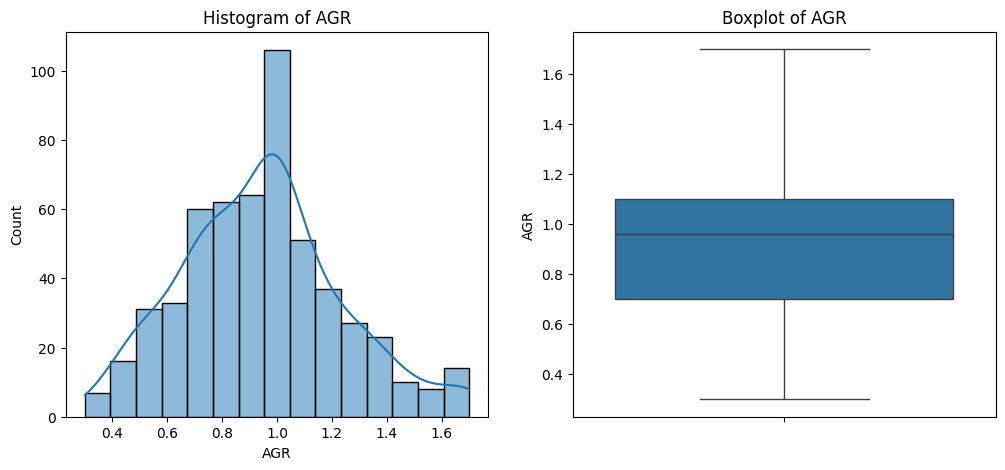

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Age', 'TB', 'DB', 'Alkphos', 'Sgot', 'Sgpt', 'TP', 'ALB', 'AGR']

# Create histograms and boxplots for numerical data
for column in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data_cleaned[column])
    plt.title(f'Boxplot of {column}')

    plt.show()


---

**Data Splitting**

In [14]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets to confirm the split
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')


Training set shape: (439, 12)
Testing set shape: (110, 12)


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data to confirm the changes
pd.DataFrame(X_train_scaled, columns=X.columns).head()


,Age,TB,DB,Alkphos,Sgot,Sgpt,TP,ALB,AGR,Ethnic,Gender,bmi
0,1.256210,-0.735127,-0.693529,-0.636857,-0.679715,-0.751365,0.299036,-0.309299,-0.830958,-0.972951,1.806138,1.333597
1,-0.295670,-0.614054,-0.585181,-0.506772,-0.310300,0.646173,0.299036,-0.062646,-0.497084,-0.972951,-0.553667,-0.749852
2,0.387157,0.596679,0.498304,2.150677,-0.568890,-0.781746,0.484064,-0.925931,-1.498706,-0.972951,-0.553667,-0.749852
3,0.014706,0.596679,0.606653,-0.376688,0.059115,0.798079,0.669091,0.553986,0.170664,1.419908,-0.553667,1.333597
4,-0.854347,-0.674591,-0.693529,-0.859860,-0.901363,-0.812128,-0.441073,-0.185973,0.170664,-0.972951,1.806138,-0.749852


---

**Model 1 - Logistic Regression**

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        76
           1       0.77      0.71      0.74        34

    accuracy                           0.85       110
   macro avg       0.82      0.81      0.81       110
weighted avg       0.84      0.85      0.84       110

Confusion Matrix:
 [[69  7]
 [10 24]]
Logistic Regression ROC-AUC Score: 0.8599071207430341


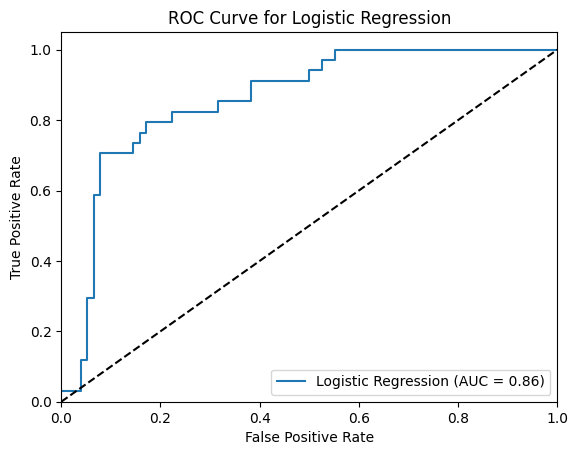

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Adjust the target variable
y_train_adjusted = y_train.map({1: 0, 2: 1})
y_test_adjusted = y_test.map({1: 0, 2: 1})

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the Logistic Regression model on the training data
log_reg.fit(X_train_scaled, y_train_adjusted)

# Make predictions on the testing data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test_adjusted, y_pred_log_reg))

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test_adjusted, y_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)

# ROC-AUC Score
roc_auc_log_reg = roc_auc_score(y_test_adjusted, log_reg.predict_proba(X_test_scaled)[:, 1])
print("Logistic Regression ROC-AUC Score:", roc_auc_log_reg)

# Plot ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_adjusted, log_reg.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [17]:
# Perform sensitivity analysis with different regularization strengths
for C_value in [0.01, 0.1, 1, 10, 100]:
    log_reg = LogisticRegression(C=C_value)
    log_reg.fit(X_train_scaled, y_train_adjusted)
    y_pred = log_reg.predict(X_test_scaled)
    roc_auc = roc_auc_score(y_test_adjusted, log_reg.predict_proba(X_test_scaled)[:, 1])
    print(f'C: {C_value}, ROC-AUC: {roc_auc:.2f}')


C: 0.01, ROC-AUC: 0.86
C: 0.1, ROC-AUC: 0.86
C: 1, ROC-AUC: 0.86
C: 10, ROC-AUC: 0.87
C: 100, ROC-AUC: 0.87


2. feature importance

In [18]:
# Display feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


    Feature  Coefficient
11      bmi     1.281621
7       ALB     1.038901
1        TB     0.345950
9    Ethnic     0.005682
3   Alkphos    -0.011289
10   Gender    -0.094512
4      Sgot    -0.239805
8       AGR    -0.327172
0       Age    -0.454089
5      Sgpt    -0.486907
2        DB    -0.813417
6        TP    -0.845989


3. cross-validation

In [19]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print(f'Cross-Validation ROC-AUC Scores: {cv_scores}')
print(f'Mean ROC-AUC Score: {cv_scores.mean():.2f}')


Cross-Validation ROC-AUC Scores: [0.86156648 0.89860352 0.83424408 0.83849423 0.86759142]
Mean ROC-AUC Score: 0.86


4. save the model

In [20]:
import joblib

# Save the model to a file
joblib.dump(log_reg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

----

**Model 2 - Random Forest**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        76
           1       0.79      0.56      0.66        34

    accuracy                           0.82       110
   macro avg       0.81      0.75      0.77       110
weighted avg       0.82      0.82      0.81       110

Confusion Matrix:
 [[71  5]
 [15 19]]
Random Forest ROC-AUC Score: 0.8765479876160991


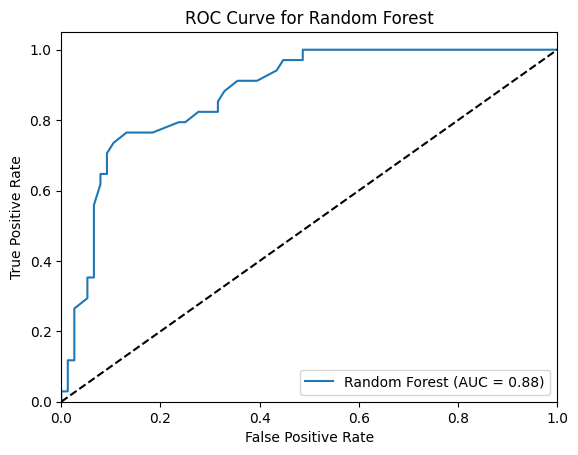

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_clf.fit(X_train_scaled, y_train_adjusted)

# Make predictions on the testing data
y_pred_rf_clf = rf_clf.predict(X_test_scaled)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test_adjusted, y_pred_rf_clf))

# Confusion Matrix
conf_matrix_rf_clf = confusion_matrix(y_test_adjusted, y_pred_rf_clf)
print("Confusion Matrix:\n", conf_matrix_rf_clf)

# ROC-AUC Score
roc_auc_rf_clf = roc_auc_score(y_test_adjusted, rf_clf.predict_proba(X_test_scaled)[:, 1])
print("Random Forest ROC-AUC Score:", roc_auc_rf_clf)

# Plot ROC Curve
fpr_rf_clf, tpr_rf_clf, _ = roc_curve(y_test_adjusted, rf_clf.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr_rf_clf, tpr_rf_clf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score: ", grid_search.best_score_)


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC score:  0.8499743122693942


2. feature importance

In [23]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


    Feature  Importance
11      bmi    0.224236
4      Sgot    0.101872
5      Sgpt    0.101456
0       Age    0.089413
3   Alkphos    0.087806
1        TB    0.084519
6        TP    0.072411
7       ALB    0.068052
8       AGR    0.063880
2        DB    0.060449
9    Ethnic    0.035615
10   Gender    0.010289


3. cross-validation

In [24]:
# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_clf, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print(f'Cross-Validation ROC-AUC Scores: {cv_scores_rf}')
print(f'Mean ROC-AUC Score: {cv_scores_rf.mean():.2f}')


Cross-Validation ROC-AUC Scores: [0.84335155 0.85913783 0.79083182 0.8132969  0.84773014]
Mean ROC-AUC Score: 0.83


4. save the model

In [25]:
import joblib

# Save the Random Forest model to a file
joblib.dump(rf_clf, 'random_forest_model.pkl')


['random_forest_model.pkl']

---

**Model 3 - LGBM**

[LightGBM] [Info] Number of positive: 134, number of negative: 305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 439, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305239 -> initscore=-0.822472
[LightGBM] [Info] Start training from score -0.822472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

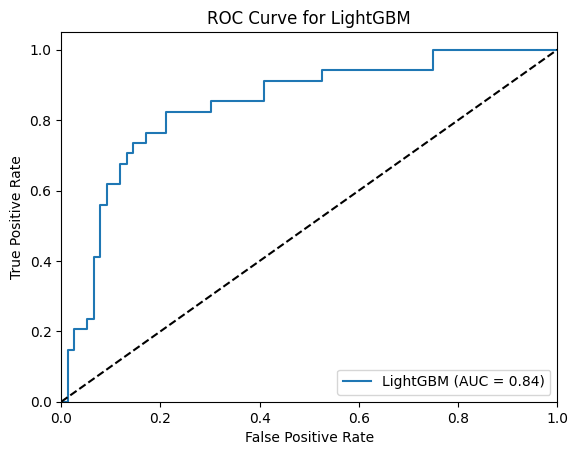

In [33]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Adjust the target variable
y_train_adjusted = y_train.map({1: 0, 2: 1})
y_test_adjusted = y_test.map({1: 0, 2: 1})

# Initialize the LightGBM model
lgb_clf = lgb.LGBMClassifier(random_state=42)

# Train the LightGBM model on the training data
lgb_clf.fit(X_train_scaled, y_train_adjusted)

# Make predictions on the testing data
y_pred_lgb_clf = lgb_clf.predict(X_test_scaled)

# Evaluate the LightGBM model
print("LightGBM Classification Report:")
print(classification_report(y_test_adjusted, y_pred_lgb_clf))

# Confusion Matrix
conf_matrix_lgb_clf = confusion_matrix(y_test_adjusted, y_pred_lgb_clf)
print("Confusion Matrix:\n", conf_matrix_lgb_clf)

# ROC-AUC Score
roc_auc_lgb_clf = roc_auc_score(y_test_adjusted, lgb_clf.predict_proba(X_test_scaled)[:, 1])
print("LightGBM ROC-AUC Score:", roc_auc_lgb_clf)

# Plot ROC Curve
fpr_lgb_clf, tpr_lgb_clf, _ = roc_curve(y_test_adjusted, lgb_clf.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr_lgb_clf, tpr_lgb_clf, label='LightGBM (AUC = %0.2f)' % roc_auc_lgb_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for LightGBM
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Initialize the GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_lgb.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_lgb.best_params_)
print("Best ROC-AUC score: ", grid_search_lgb.best_score_)


[LightGBM] [Info] Number of positive: 134, number of negative: 305
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 439, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305239 -> initscore=-0.822472
[LightGBM] [Info] Start training from score -0.822472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

2. features importance

In [37]:
# Display feature importances
feature_importances_lgb = pd.DataFrame({'Feature': X.columns, 'Importance': lgb_clf.feature_importances_})
feature_importances_lgb = feature_importances_lgb.sort_values(by='Importance', ascending=False)
print(feature_importances_lgb)


    Feature  Importance
3   Alkphos         247
5      Sgpt         223
4      Sgot         220
0       Age         210
6        TP         169
7       ALB         108
9    Ethnic         108
1        TB          91
8       AGR          91
2        DB          88
11      bmi          72
10   Gender          27


3. cross-validation

In [38]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_lgb = cross_val_score(lgb_clf, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print(f'Cross-Validation ROC-AUC Scores: {cv_scores_lgb}')
print(f'Mean ROC-AUC Score: {cv_scores_lgb.mean():.2f}')


[LightGBM] [Info] Number of positive: 107, number of negative: 244
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 351, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.304843 -> initscore=-0.824339
[LightGBM] [Info] Start training from score -0.824339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

4. save the model

In [39]:
import joblib

# Save the LightGBM model to a file
joblib.dump(lgb_clf, 'lightgbm_model.pkl')


['lightgbm_model.pkl']

---

**Model 4 - kNN**

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        76
           1       0.80      0.59      0.68        34

    accuracy                           0.83       110
   macro avg       0.82      0.76      0.78       110
weighted avg       0.82      0.83      0.82       110

Confusion Matrix:
 [[71  5]
 [14 20]]
K-Nearest Neighbors ROC-AUC Score: 0.8450077399380806


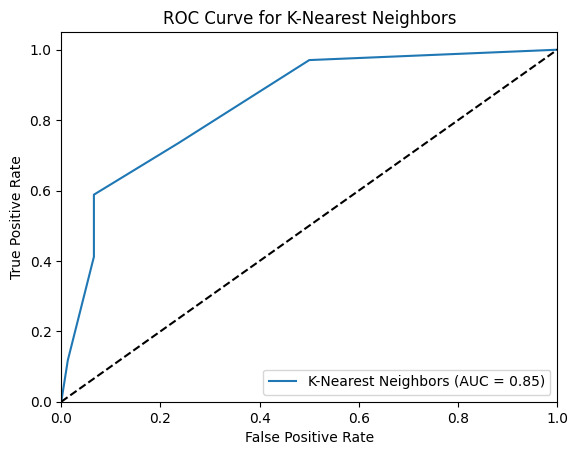

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize the KNN model
knn_clf = KNeighborsClassifier()

# Train the KNN model on the training data
knn_clf.fit(X_train_scaled, y_train_adjusted)

# Make predictions on the testing data
y_pred_knn_clf = knn_clf.predict(X_test_scaled)

# Evaluate the KNN model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test_adjusted, y_pred_knn_clf))

# Confusion Matrix
conf_matrix_knn_clf = confusion_matrix(y_test_adjusted, y_pred_knn_clf)
print("Confusion Matrix:\n", conf_matrix_knn_clf)

# ROC-AUC Score
roc_auc_knn_clf = roc_auc_score(y_test_adjusted, knn_clf.predict_proba(X_test_scaled)[:, 1])
print("K-Nearest Neighbors ROC-AUC Score:", roc_auc_knn_clf)

# Plot ROC Curve
fpr_knn_clf, tpr_knn_clf, _ = roc_curve(y_test_adjusted, knn_clf.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr_knn_clf, tpr_knn_clf, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [42]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_knn.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best ROC-AUC score: ", grid_search_knn.best_score_)



Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best ROC-AUC score:  0.8582901312409508


2. features importance

- Unlike tree-based models, KNN does not provide intrinsic feature importance. Therefore, feature importance analysis is not applicable for KNN.

3, cross-validation

In [43]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_knn = cross_val_score(grid_search_knn.best_estimator_, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print(f'Cross-Validation ROC-AUC Scores: {cv_scores_knn}')
print(f'Mean ROC-AUC Score: {cv_scores_knn.mean():.2f}')


Cross-Validation ROC-AUC Scores: [0.88038859 0.87613843 0.85185185 0.83029751 0.85277427]
Mean ROC-AUC Score: 0.86


4. save the model

In [44]:
import joblib

# Save the KNN model to a file
joblib.dump(grid_search_knn.best_estimator_, 'knn_model.pkl')


['knn_model.pkl']

---

**Model 5 - SVM**

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        76
           1       0.79      0.68      0.73        34

    accuracy                           0.85       110
   macro avg       0.83      0.80      0.81       110
weighted avg       0.84      0.85      0.84       110

Confusion Matrix:
 [[70  6]
 [11 23]]
Support Vector Machine ROC-AUC Score: 0.8711300309597523


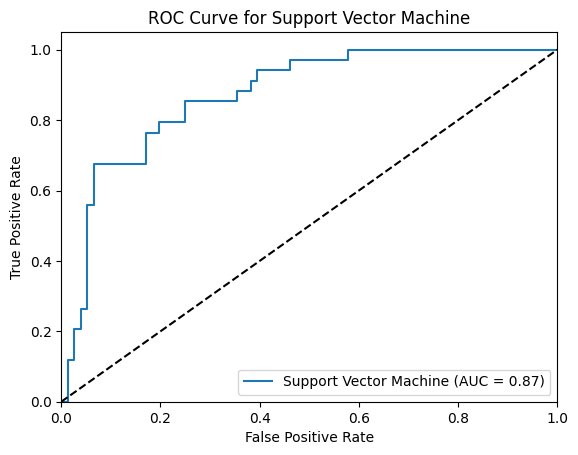

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the SVM model with probability estimates enabled
svm_clf = SVC(probability=True)

# Train the SVM model on the training data
svm_clf.fit(X_train_scaled, y_train_adjusted)

# Make predictions on the testing data
y_pred_svm_clf = svm_clf.predict(X_test_scaled)

# Evaluate the SVM model
print("Support Vector Machine Classification Report:")
print(classification_report(y_test_adjusted, y_pred_svm_clf))

# Confusion Matrix
conf_matrix_svm_clf = confusion_matrix(y_test_adjusted, y_pred_svm_clf)
print("Confusion Matrix:\n", conf_matrix_svm_clf)

# ROC-AUC Score
roc_auc_svm_clf = roc_auc_score(y_test_adjusted, svm_clf.predict_proba(X_test_scaled)[:, 1])
print("Support Vector Machine ROC-AUC Score:", roc_auc_svm_clf)

# Plot ROC Curve
fpr_svm_clf, tpr_svm_clf, _ = roc_curve(y_test_adjusted, svm_clf.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr_svm_clf, tpr_svm_clf, label='Support Vector Machine (AUC = %0.2f)' % roc_auc_svm_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [46]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_svm.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_svm.best_params_)
print("Best ROC-AUC score: ", grid_search_svm.best_score_)


Best parameters found:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best ROC-AUC score:  0.8625986642380085


2. features importance

- Support Vector Machines (SVMs) do not provide intrinsic feature importance in the same way tree-based models do. However, for linear SVMs, can look at the coefficients to get an idea of the importance of features. For non-linear SVMs, this becomes more complex, but one common approach is to use permutation feature importance.

In [49]:
# Check if the best estimator is linear
if grid_search_svm.best_params_['kernel'] == 'linear':
    # Extract feature importance (coefficients)
    feature_importance = grid_search_svm.best_estimator_.coef_[0]
    
    # Create a DataFrame to display feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    print("Feature Importance:\n", feature_importance_df)


In [50]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
perm_importance = permutation_importance(grid_search_svm.best_estimator_, X_test_scaled, y_test_adjusted, n_repeats=10, random_state=42)

# Create a DataFrame to display permutation feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Feature Importance:\n", feature_importance_df)


Permutation Feature Importance:
     Feature  Importance
11      bmi    0.180000
2        DB    0.019091
1        TB    0.016364
5      Sgpt    0.015455
4      Sgot    0.013636
0       Age    0.009091
6        TP    0.008182
3   Alkphos    0.005455
9    Ethnic    0.003636
10   Gender    0.000000
8       AGR   -0.002727
7       ALB   -0.008182


3. cross-validation

In [47]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_svm = cross_val_score(grid_search_svm.best_estimator_, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print(f'Cross-Validation ROC-AUC Scores: {cv_scores_svm}')
print(f'Mean ROC-AUC Score: {cv_scores_svm.mean():.2f}')


Cross-Validation ROC-AUC Scores: [0.86945962 0.86156648 0.86156648 0.85974499 0.86065574]
Mean ROC-AUC Score: 0.86


4. save the model

In [48]:
import joblib

# Save the SVM model to a file
joblib.dump(grid_search_svm.best_estimator_, 'svm_model.pkl')


['svm_model.pkl']

---

**Model 6 - Decision Tree**

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        76
           1       0.50      0.50      0.50        34

    accuracy                           0.69       110
   macro avg       0.64      0.64      0.64       110
weighted avg       0.69      0.69      0.69       110

Confusion Matrix:
 [[59 17]
 [17 17]]
Decision Tree ROC-AUC Score: 0.6381578947368421


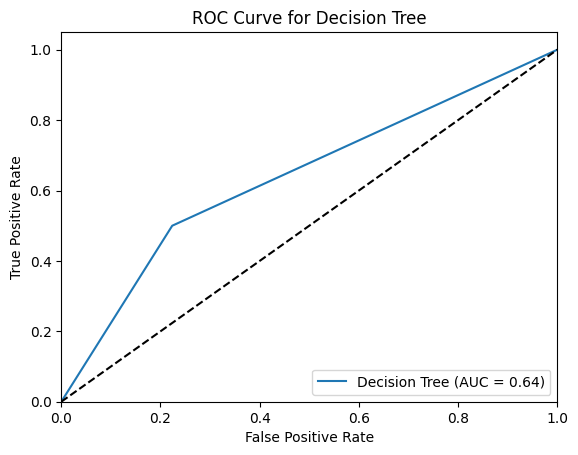

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
dt_clf.fit(X_train_scaled, y_train_adjusted)

# Make predictions on the testing data
y_pred_dt_clf = dt_clf.predict(X_test_scaled)

# Evaluate the Decision Tree model
print("Decision Tree Classification Report:")
print(classification_report(y_test_adjusted, y_pred_dt_clf))

# Confusion Matrix
conf_matrix_dt_clf = confusion_matrix(y_test_adjusted, y_pred_dt_clf)
print("Confusion Matrix:\n", conf_matrix_dt_clf)

# ROC-AUC Score
roc_auc_dt_clf = roc_auc_score(y_test_adjusted, dt_clf.predict_proba(X_test_scaled)[:, 1])
print("Decision Tree ROC-AUC Score:", roc_auc_dt_clf)

# Plot ROC Curve
fpr_dt_clf, tpr_dt_clf, _ = roc_curve(y_test_adjusted, dt_clf.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr_dt_clf, tpr_dt_clf, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_dt.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best ROC-AUC score: ", grid_search_dt.best_score_)


Best parameters found:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC-AUC score:  0.8113072719630097


2. features importance

In [53]:
# Extract feature importance
feature_importance = grid_search_dt.best_estimator_.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)


Feature Importance:
     Feature  Importance
11      bmi    0.730771
5      Sgpt    0.115199
2        DB    0.097746
4      Sgot    0.037261
0       Age    0.019023
1        TB    0.000000
3   Alkphos    0.000000
6        TP    0.000000
7       ALB    0.000000
8       AGR    0.000000
9    Ethnic    0.000000
10   Gender    0.000000


3. cross-validation

In [54]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_dt = cross_val_score(grid_search_dt.best_estimator_, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print(f'Cross-Validation ROC-AUC Scores: {cv_scores_dt}')
print(f'Mean ROC-AUC Score: {cv_scores_dt.mean():.2f}')


Cross-Validation ROC-AUC Scores: [0.80843959 0.84942319 0.79356406 0.7671524  0.83795712]
Mean ROC-AUC Score: 0.81


4. save the model

In [55]:
import joblib

# Save the Decision Tree model to a file
joblib.dump(grid_search_dt.best_estimator_, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

---

**Model 7 - Extreme Gradient Boost**

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        76
           1       0.76      0.65      0.70        34

    accuracy                           0.83       110
   macro avg       0.81      0.78      0.79       110
weighted avg       0.82      0.83      0.82       110

Confusion Matrix:
 [[69  7]
 [12 22]]
XGBoost ROC-AUC Score: 0.8564241486068112


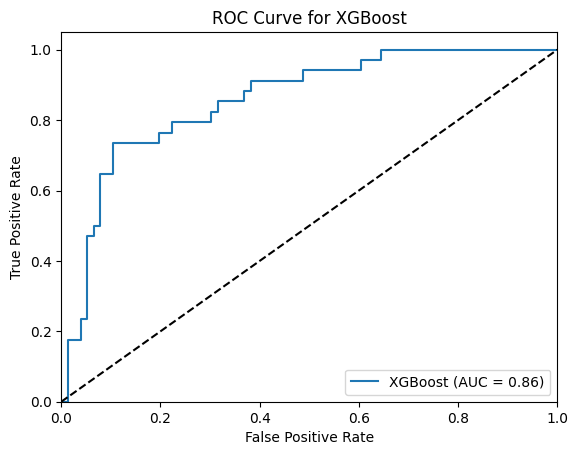

In [58]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the XGBoost model
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the training data
xgb_clf.fit(X_train_scaled, y_train_adjusted)

# Make predictions on the testing data
y_pred_xgb_clf = xgb_clf.predict(X_test_scaled)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test_adjusted, y_pred_xgb_clf))

# Confusion Matrix
conf_matrix_xgb_clf = confusion_matrix(y_test_adjusted, y_pred_xgb_clf)
print("Confusion Matrix:\n", conf_matrix_xgb_clf)

# ROC-AUC Score
roc_auc_xgb_clf = roc_auc_score(y_test_adjusted, xgb_clf.predict_proba(X_test_scaled)[:, 1])
print("XGBoost ROC-AUC Score:", roc_auc_xgb_clf)

# Plot ROC Curve
fpr_xgb_clf, tpr_xgb_clf, _ = roc_curve(y_test_adjusted, xgb_clf.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(fpr_xgb_clf, tpr_xgb_clf, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb_clf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()


1. sensitivity analysis

In [59]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train_adjusted)

# Print best parameters and best score
print("Best parameters found: ", grid_search_xgb.best_params_)
print("Best ROC-AUC score: ", grid_search_xgb.best_score_)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best ROC-AUC score:  0.8549810844892812


2. features importance

In [60]:
# Extract feature importance
feature_importance = grid_search_xgb.best_estimator_.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)


Feature Importance:
     Feature  Importance
11      bmi    0.431480
2        DB    0.069887
9    Ethnic    0.067024
1        TB    0.056405
5      Sgpt    0.054448
4      Sgot    0.050121
0       Age    0.047970
8       AGR    0.047681
6        TP    0.046041
3   Alkphos    0.043779
10   Gender    0.043057
7       ALB    0.042108


3. cross-validation

In [61]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train_scaled, y_train_adjusted, cv=5, scoring='roc_auc')
print(f'Cross-Validation ROC-AUC Scores: {cv_scores_xgb}')
print(f'Mean ROC-AUC Score: {cv_scores_xgb.mean():.2f}')


Cross-Validation ROC-AUC Scores: [0.84153005 0.88281724 0.83970856 0.81299332 0.89785624]
Mean ROC-AUC Score: 0.85


4. save the model

In [62]:
import joblib

# Save the XGBoost model to a file
joblib.dump(grid_search_xgb.best_estimator_, 'xgboost_model.pkl')


['xgboost_model.pkl']

---

**Summary**

In [64]:
import pandas as pd
from tabulate import tabulate

# Data for each model
model_summary = {
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'XGBoost'],
    'Accuracy': [0.85, 0.82, 0.81, 0.83, 0.85, 0.69, 0.83],
    'Precision (0)': [0.87, 0.83, 0.85, 0.84, 0.86, 0.78, 0.85],
    'Precision (1)': [0.77, 0.79, 0.71, 0.80, 0.79, 0.50, 0.76],
    'Recall (0)': [0.91, 0.93, 0.88, 0.93, 0.92, 0.78, 0.91],
    'Recall (1)': [0.71, 0.56, 0.65, 0.59, 0.68, 0.50, 0.65],
    'F1-score (0)': [0.89, 0.88, 0.86, 0.88, 0.89, 0.78, 0.88],
    'F1-score (1)': [0.74, 0.66, 0.68, 0.68, 0.73, 0.50, 0.70],
    'ROC-AUC Score': [0.86, 0.88, 0.84, 0.85, 0.87, 0.64, 0.86]
}

# Create DataFrame
summary_df = pd.DataFrame(model_summary)

# Display summary table with tabulate
print(tabulate(summary_df, headers='keys', tablefmt='grid'))



+----+------------------------+------------+-----------------+-----------------+--------------+--------------+----------------+----------------+-----------------+
|    | Model                  |   Accuracy |   Precision (0) |   Precision (1) |   Recall (0) |   Recall (1) |   F1-score (0) |   F1-score (1) |   ROC-AUC Score |
+====+========================+============+=================+=================+==============+==============+================+================+=================+
|  0 | Logistic Regression    |       0.85 |            0.87 |            0.77 |         0.91 |         0.71 |           0.89 |           0.74 |            0.86 |
+----+------------------------+------------+-----------------+-----------------+--------------+--------------+----------------+----------------+-----------------+
|  1 | Random Forest          |       0.82 |            0.83 |            0.79 |         0.93 |         0.56 |           0.88 |           0.66 |            0.88 |
+----+----------------

### Best Model Selection:

#### Support Vector Machine (SVM):
- High accuracy (0.85), high precision, recall, and F1-scores.
- High ROC-AUC Score (0.87), indicating strong discriminatory power.

#### Random Forest:
- Slightly lower accuracy (0.82) but highest ROC-AUC Score (0.88), indicating very strong discriminatory power.

#### Logistic Regression:
- High accuracy (0.85) and balanced performance across metrics.
- High ROC-AUC Score (0.86).

#### XGBoost:
- Good accuracy (0.83) and strong ROC-AUC Score (0.86).
- Balanced feature importance and good performance metrics.

#### K-Nearest Neighbors:
- Good accuracy (0.83) and strong ROC-AUC Score (0.85).
- Good balance between precision and recall.

#### LightGBM:
- Good accuracy (0.81) and balanced performance across metrics.
- Good ROC-AUC Score (0.84).

#### Decision Tree:
- Lower accuracy (0.69) and less balanced performance.
- Lowest ROC-AUC Score (0.64), indicating weaker performance.

### Conclusion:
- **Best Overall Model**: Support Vector Machine (SVM) due to its high accuracy and strong ROC-AUC score.
- **Strong Alternative**: Random Forest for its highest ROC-AUC score despite slightly lower accuracy.
- **Third Choice**: Logistic Regression due to its high accuracy and balanced metrics.
